In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [21]:
# Loading the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

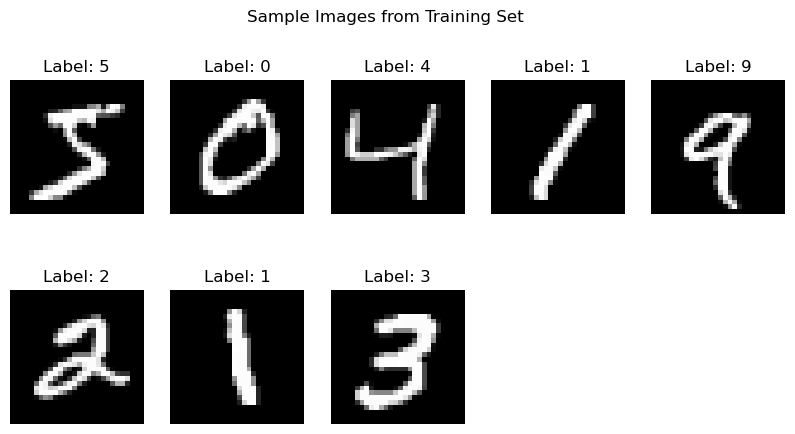

In [3]:
# Display some images from the training set
plt.figure(figsize=(10, 5))
for i in range(8):  # Display 10 images
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.suptitle('Sample Images from Training Set')
plt.show()

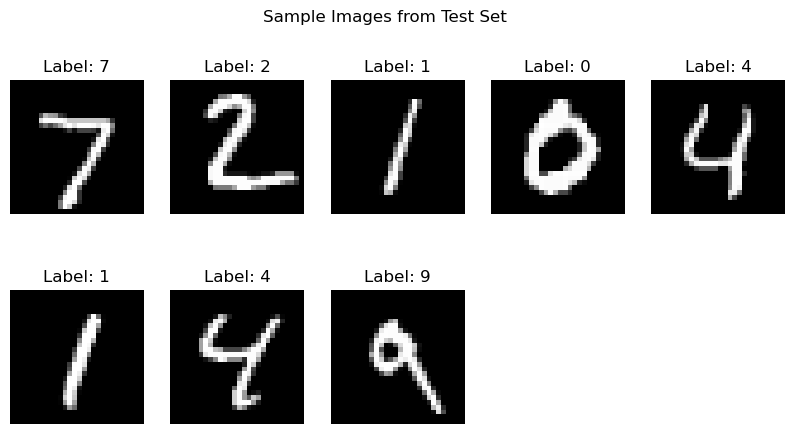

In [4]:
# Display some images from the test set
plt.figure(figsize=(10, 5))
for i in range(8):  # Display 10 images
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')

plt.suptitle('Sample Images from Test Set')
plt.show()

In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

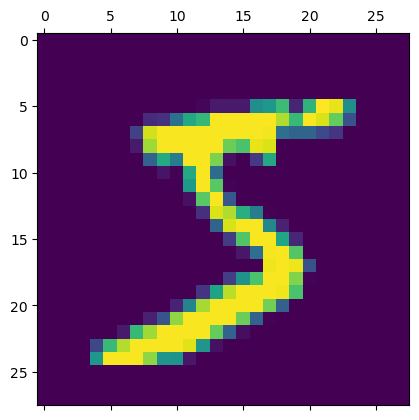

In [9]:
plt.matshow(X_train[0])

In [10]:
# Normalizing pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
# Creating a Convolutional Neural Network (CNN) model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),a 
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [13]:
# Reshape the input to fit the CNN model
X_train_reshaped = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [14]:
# Train the model
model.fit(X_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1348 - accuracy: 0.9579
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0426 - accuracy: 0.9869
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0303 - accuracy: 0.9905
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0209 - accuracy: 0.9938
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0164 - accuracy: 0.9948
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0117 - accuracy: 0.9962
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0096 - accuracy: 0.9968
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0085 - accuracy: 0.9972
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0065 - accuracy: 0.9979
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step

In [15]:
# Evaluate the model on the test set
model.evaluate(X_test_reshaped, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0363 - accuracy: 0.9913


[0.036282479763031006, 0.9912999868392944]

In [16]:
# Make predictions on the test set
y_predicted = model.predict(X_test_reshaped)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 [==============================] - 1s 3ms/step


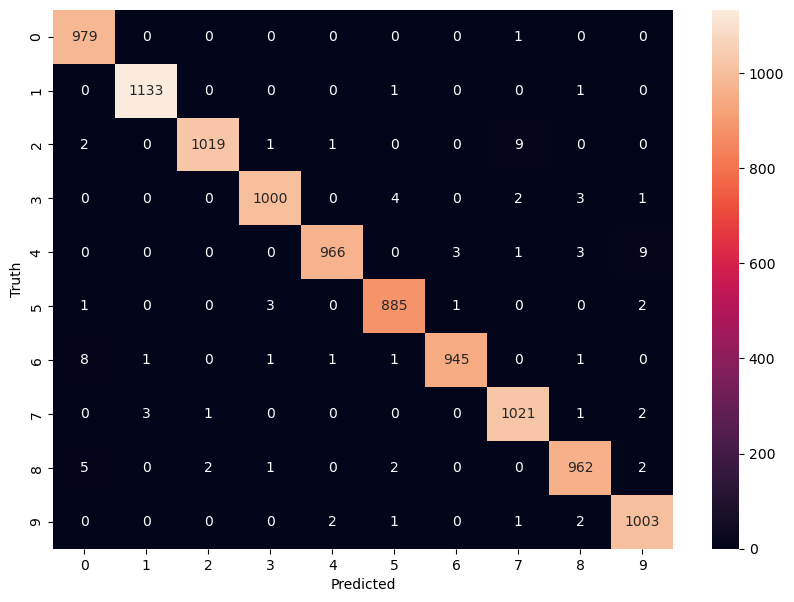

In [17]:
# Create and display the confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

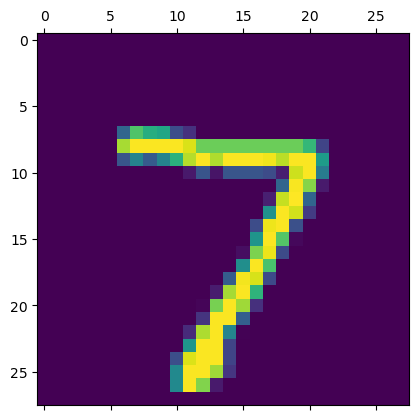

In [18]:
plt.matshow(X_test[0])

In [19]:
np.argmax(y_predicted[0])

7